<h1>Importing relevant Libraries here</h1>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# !pip install pandas_datareader
from pandas_datareader import data, wb
from scipy import stats

<h1>0. Data Selection</h1>

For this work, we'll be using the <b>Goldman Sachs Physical Gold ETF (AAAU)</b> which is traded in USD as the gold ETF. 

Our choice for equity ETF is the <b>iShares VII Public Limited Company - iShares Nikkei</b> which is traded in GBp in LSE (London Stock Exchange )

The source of the dataset is <a href='https://finance.yahoo.com'>Yahoo Finane</a>

<h1>1. Data Importing</h1>

In [2]:
#writing a helper function which takes in the ticker and returns the oct and nov data set

def get_oct_and_nov_data(ticker, database='yahoo'):
    start_oct = dt.datetime(2019,10,1)
    end_oct = dt.datetime(2019,10,31)
    start_nov = dt.datetime(2019,11,1)
    end_nov = dt.datetime(2019,11,30)

    oct_data = data.DataReader(ticker, database, start_oct,end_oct)
    nov_data = data.DataReader(ticker, database, start_nov,end_nov)
#     print(oct_data.head(2))
#     print(oct_data.tail(2))
#     print(nov_data.head(2))
#     print(nov_data.tail(2))
    return oct_data, nov_data

In [3]:
print("Getting the Gold ETF (AAAU) dataset")
gold_etf_oct_data, gold_etf_nov_data = get_oct_and_nov_data("AAAU")

Getting the Gold ETF (AAAU) dataset


In [4]:
print("Getting the Equity ETF (CNKY.L) dataset")
equity_etf_oct_data, equity_etf_nov_data = get_oct_and_nov_data("CNKY.L")

Getting the Equity ETF (CNKY.L) dataset


In [5]:
print("n year treasury yield i.e. n data ")
n=[2,3,5,7,10,30]

treasury_data_oct = pd.DataFrame()
treasury_data_nov = pd.DataFrame()

for year in n[::-1]:
    print("year", year)
    treasy_yield_yr_oct_data, treasy_yield_yr_nov_data = get_oct_and_nov_data("DGS"+str(year),'fred')
    
    if(not(treasury_data_oct.empty)):
        treasury_data_oct = pd.merge(treasy_yield_yr_oct_data, treasury_data_oct, how="outer",on="DATE")
        treasury_data_nov = pd.merge(treasy_yield_yr_nov_data, treasury_data_nov, how="outer",on="DATE")

    else:
        treasury_data_oct = treasy_yield_yr_oct_data
        treasury_data_nov = treasy_yield_yr_nov_data
        
print(treasury_data_oct)
print(treasury_data_nov)

n year treasury yield i.e. n data 
year 30
year 10
year 7
year 5
year 3
year 2
            DGS2  DGS3  DGS5  DGS7  DGS10  DGS30
DATE                                            
2019-10-01  1.56  1.51  1.51  1.59   1.65   2.11
2019-10-02  1.48  1.43  1.43  1.53   1.60   2.09
2019-10-03  1.39  1.34  1.34  1.45   1.54   2.04
2019-10-04  1.40  1.35  1.34  1.43   1.52   2.01
2019-10-07  1.46  1.41  1.38  1.47   1.56   2.05
2019-10-08  1.42  1.38  1.36  1.45   1.54   2.04
2019-10-09  1.47  1.43  1.40  1.50   1.59   2.08
2019-10-10  1.53  1.49  1.48  1.57   1.67   2.16
2019-10-11  1.63  1.60  1.59  1.68   1.76   2.22
2019-10-14   NaN   NaN   NaN   NaN    NaN    NaN
2019-10-15  1.61  1.60  1.59  1.68   1.77   2.23
2019-10-16  1.58  1.57  1.57  1.65   1.75   2.23
2019-10-17  1.60  1.57  1.57  1.66   1.76   2.24
2019-10-18  1.58  1.56  1.56  1.66   1.76   2.25
2019-10-21  1.62  1.59  1.61  1.70   1.80   2.28
2019-10-22  1.60  1.59  1.60  1.68   1.78   2.26
2019-10-23  1.58  1.58  1.58  1.67   1.

<h1>2. Data Processing</h1>

In [6]:
#Cleaning the treasury yield data
treasury_data_oct = treasury_data_oct.dropna() #Dropping NaN values
treasury_data_nov = treasury_data_nov.dropna()

In [7]:
#This functions takes a stock data df as input and computes the returns
def calculate_daily_returns(df):
    df['Daily_Return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    return df

In [8]:
equity_etf_oct_data=calculate_daily_returns(equity_etf_oct_data)
equity_etf_nov_data=calculate_daily_returns(equity_etf_nov_data)
gold_etf_oct_data=calculate_daily_returns(gold_etf_oct_data)
gold_etf_nov_data=calculate_daily_returns(gold_etf_nov_data)


<h1>3. Data Summaries</h1>

# 3.1-3 Calculating average yield of benchmark securities, gold ETF and equity ETF

In [9]:
print("#"*70)
print("Averages for the benchMarks")
print("The averages for October are : {}".format(np.mean(treasury_data_oct)))
print("The averages for November are : {}".format(np.mean(treasury_data_nov)))

print("#"*70)
print("Averages for the gold ETF")
print("The average for October is: {}".format(np.mean(gold_etf_oct_data['Adj Close'])))
print("The average for November is: {}".format(np.mean(gold_etf_nov_data['Adj Close'])))

print("#"*70)
print("Averages for the Equity ETF")
print("The average for October is : {}".format(np.mean(equity_etf_oct_data['Adj Close'])))
print("The average for November is : {}".format(np.mean(equity_etf_nov_data['Adj Close'])))

######################################################################
Averages for the benchMarks
The averages for October are : DGS2     1.551364
DGS3     1.528182
DGS5     1.525000
DGS7     1.615000
DGS10    1.706818
DGS30    2.190455
dtype: float64
The averages for November are : DGS2     1.612632
DGS3     1.612105
DGS5     1.639474
DGS7     1.735789
DGS10    1.812105
DGS30    2.280526
dtype: float64
######################################################################
Averages for the gold ETF
The average for October is: 14.916087026181428
The average for November is: 14.676000022888184
######################################################################
Averages for the Equity ETF
The average for October is : 15384.58695652174
The average for November is : 15715.5


# 3.3-5 Calculating standard deviation of benchmark securities, gold ETF and equity ETF

In [10]:
print("#"*70)
print("Calculating the standard deviations of the benchMark securities")
print("The standard deviations for the month of October are: {}".format(np.std(treasury_data_oct)))
print("The standard deviations for the month of November are : {}".format(np.std(treasury_data_nov)))

print("#"*70)
print("Standard deviations for the gold ETF")
print("The standard deviation for October is : {}".format(np.std(gold_etf_oct_data['Adj Close'])))
print("The standard deviation for November is : {}".format(np.std(gold_etf_nov_data['Adj Close'])))

print("#"*70)
print("Standard deviations for the equity ETF")
print("The standard deviation for October is : {}".format(np.std(equity_etf_oct_data['Adj Close'])))
print("The standard deviation for November is : {}".format(np.std(equity_etf_nov_data['Adj Close'])))

######################################################################
Calculating the standard deviations of the benchMark securities
The standard deviations for the month of October are: DGS2     0.078468
DGS3     0.094226
DGS5     0.102058
DGS7     0.098338
DGS10    0.102398
DGS30    0.098971
dtype: float64
The standard deviations for the month of November are : DGS2     0.032902
DGS3     0.042868
DGS5     0.051347
DGS7     0.059411
DGS10    0.063294
DGS30    0.074866
dtype: float64
######################################################################
Standard deviations for the gold ETF
The standard deviation for October is : 0.08869776968009653
The standard deviation for November is : 0.15897793656373374
######################################################################
Standard deviations for the equity ETF
The standard deviation for October is : 110.29433468973048
The standard deviation for November is : 102.59014618976862


<h1>4. Graphing</h1>

<h3>4.1 Graphing the 6 benchmark securities for the 2 months on 1 plot</h3>

Text(0, 0.5, 'Yield')

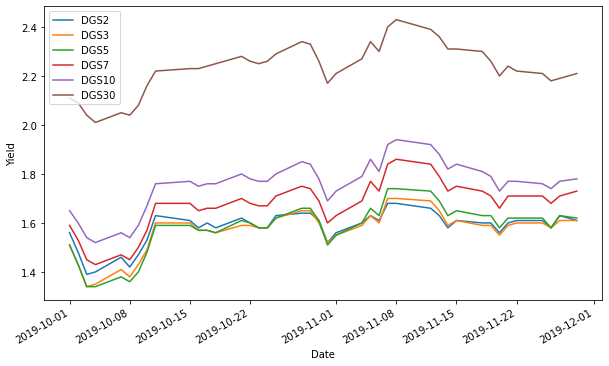

In [11]:
treasury_data=pd.concat([treasury_data_oct,treasury_data_nov])
plot=treasury_data.plot(figsize=(10, 6))
plot.set_xlabel("Date")
plot.set_ylabel("Yield")

In [12]:
treasury_data

,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30
DATE,,,,,,
2019-10-01,1.56,1.51,1.51,1.59,1.65,2.11
2019-10-02,1.48,1.43,1.43,1.53,1.60,2.09
2019-10-03,1.39,1.34,1.34,1.45,1.54,2.04
2019-10-04,1.40,1.35,1.34,1.43,1.52,2.01
2019-10-07,1.46,1.41,1.38,1.47,1.56,2.05
2019-10-08,1.42,1.38,1.36,1.45,1.54,2.04
2019-10-09,1.47,1.43,1.40,1.50,1.59,2.08
2019-10-10,1.53,1.49,1.48,1.57,1.67,2.16
2019-10-11,1.63,1.60,1.59,1.68,1.76,2.22


<h3>4.2 & 3 Ploting gold and equity ETF prices</h3>

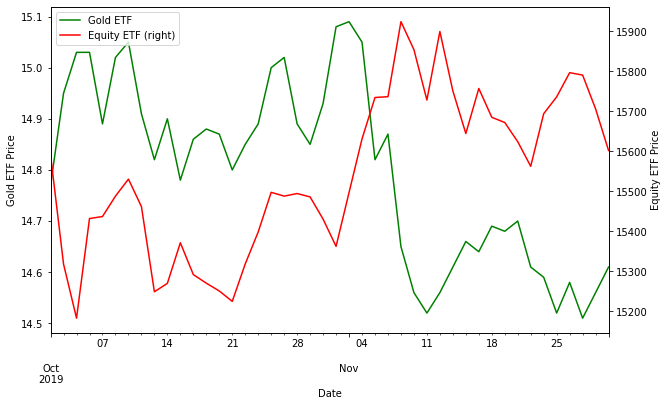

In [38]:
plt.figure(figsize=(10,6))
gold_etf=pd.concat([gold_etf_oct_data["Adj Close"],gold_etf_nov_data["Adj Close"]])
equity_etf=pd.concat([equity_etf_oct_data["Adj Close"],equity_etf_nov_data["Adj Close"]])

ax1 = gold_etf.plot(color='green', label='Gold ETF')
ax2 = equity_etf.plot(color='red', secondary_y=True,label='Equity ETF')
ax1.set_xlabel("Date")
ax1.set_ylabel("Gold ETF Price")
ax2.set_xlabel("Date")
ax2.set_ylabel("Equity ETF Price")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [14]:
gold_etf

Date
2019-10-01    14.77
2019-10-02    14.95
2019-10-03    15.03
2019-10-04    15.03
2019-10-07    14.89
2019-10-08    15.02
2019-10-09    15.05
2019-10-10    14.91
2019-10-11    14.82
2019-10-14    14.90
2019-10-15    14.78
2019-10-16    14.86
2019-10-17    14.88
2019-10-18    14.87
2019-10-21    14.80
2019-10-22    14.85
2019-10-23    14.89
2019-10-24    15.00
2019-10-25    15.02
2019-10-28    14.89
2019-10-29    14.85
2019-10-30    14.93
2019-10-31    15.08
2019-11-01    15.09
2019-11-04    15.05
2019-11-05    14.82
2019-11-06    14.87
2019-11-07    14.65
2019-11-08    14.56
2019-11-11    14.52
2019-11-12    14.56
2019-11-13    14.61
2019-11-14    14.66
2019-11-15    14.64
2019-11-18    14.69
2019-11-19    14.68
2019-11-20    14.70
2019-11-21    14.61
2019-11-22    14.59
2019-11-25    14.52
2019-11-26    14.58
2019-11-27    14.51
2019-11-29    14.61
Name: Adj Close, dtype: float64

<h1>5. Fitting the Yield Curve</h1>

# 5.1 Nelson-Siegel Equation

In [15]:
print("f (t) = β0 + β1 * exp(-t / Ʈ) + β2 * exp(-t / Ʈ) * (-t / Ʈ)")

f (t) = β0 + β1 * exp(-t / Ʈ) + β2 * exp(-t / Ʈ) * (-t / Ʈ)


# 5.2 For October Data


In [16]:
# !pip install nelson_siegel_svensson
from nelson_siegel_svensson import NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

In [17]:
t = np.array(n)
y_oct=np.array(np.mean(treasury_data_oct))
y_nov=np.array(np.mean(treasury_data_nov))
curve_fit_oct, status_oct = calibrate_ns_ols(t, y_oct) #NS model calibrate
curve_fit_nov, status_oct = calibrate_ns_ols(t, y_nov) #NS model calibrate

print("For month of October")
print(curve_fit_oct)
print("For month of November")
print(curve_fit_nov)

For month of October
NelsonSiegelCurve(beta0=2.5349155033192985, beta1=-0.8131504942441159, beta2=-1.88649990565442, tau=3.843123719277597)
For month of November
NelsonSiegelCurve(beta0=2.654784157142379, beta1=-0.9992541248984628, beta2=-1.435000541601094, tau=4.654243936830383)


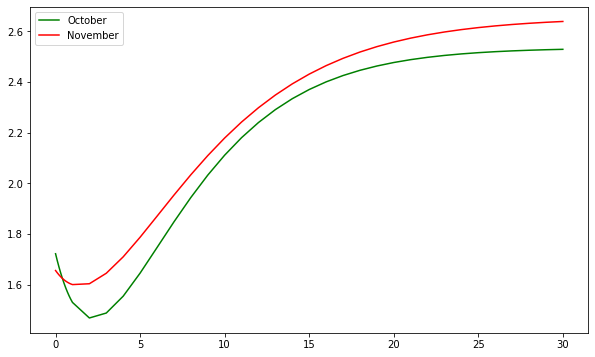

In [18]:
t=np.array([i for i in np.linspace(0,1,11)])
t=np.append(t,np.array([i for i in range(1,31,1)]))
NS_Fwd_oct = np.array([ NelsonSiegelCurve.forward(curve_fit_oct,i) for i in t])
NS_Fwd_nov = np.array([ NelsonSiegelCurve.forward(curve_fit_nov,i) for i in t])
plt.figure(figsize=(10,6))
ax1=plt.plot(t,NS_Fwd_oct,color='green', label='October')
ax2=plt.plot(t,NS_Fwd_nov,color='red', label='November')
plt.legend()
plt.show()

Here we see significant difference between the values of tau(hump) for the months of October and November. For the month of November it is quite high where as the slope(beta2) has become less negative. This means that the hump/curvature of the curve has decreased and the slope has become less negative i.e more positive, This implies that the rate of return is seen to be on the rise for the month of november as can be seen in the graph above

# 6. Modelling Prices

In [19]:
from statsmodels.tsa.arima.model import ARIMA
def apply_ARIMA_model(df,is_28_holiday=False):
    proposed_index=pd.period_range(df.index[0],df.index[df.index.shape[0]-1],freq='B')
    ignore = []
    if is_28_holiday:
        for each in proposed_index:
            if each.month==11 and each.day ==28:
                ignore.append(each)
        proposed_index=proposed_index.drop(ignore)
    df.index=proposed_index
    
    model=ARIMA(df,order=(1,0,1))
    
    model_fit = model.fit()
    
    print(model_fit.summary())

In [20]:
apply_ARIMA_model(gold_etf_oct_data['Adj Close'])

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   23
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  25.426
Date:                Mon, 04 Apr 2022   AIC                            -42.852
Time:                        19:13:26   BIC                            -38.310
Sample:                    10-01-2019   HQIC                           -41.710
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9161      0.026    571.853      0.000      14.865      14.967
ar.L1          0.1328      0.592      0.224      0.823      -1.028       1.294
ma.L1          0.4215      0.529      0.797      0.4

In [21]:
apply_ARIMA_model(gold_etf_nov_data['Adj Close'],True)

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  19.110
Date:                Mon, 04 Apr 2022   AIC                            -30.221
Time:                        19:13:26   BIC                            -26.238
Sample:                    11-01-2019   HQIC                           -29.443
                         - 11-29-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7564      0.148     99.616      0.000      14.466      15.047
ar.L1          0.8936      0.134      6.674      0.000       0.631       1.156
ma.L1          0.0271      0.279      0.097      0.9

In [22]:
apply_ARIMA_model(equity_etf_oct_data['Adj Close'])

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   23
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -135.229
Date:                Mon, 04 Apr 2022   AIC                            278.459
Time:                        19:13:27   BIC                            283.001
Sample:                    10-01-2019   HQIC                           279.601
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.539e+04     32.619    471.756      0.000    1.53e+04    1.55e+04
ar.L1          0.1122      0.293      0.382      0.702      -0.463       0.687
ma.L1          0.7246      0.272      2.663      0.0

In [23]:
apply_ARIMA_model(equity_etf_nov_data['Adj Close'])

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -122.754
Date:                Mon, 04 Apr 2022   AIC                            253.508
Time:                        19:13:27   BIC                            257.686
Sample:                    11-01-2019   HQIC                           254.415
                         - 11-29-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.571e+04     30.682    511.917      0.000    1.56e+04    1.58e+04
ar.L1         -0.0944      0.429     -0.220      0.826      -0.936       0.747
ma.L1          0.9856      1.847      0.534      0.5

# 7. Modelling Volatility 

In [24]:
#pip install arch
from arch import arch_model

In [25]:
gold_etf_oct_data['High_Minus_Low']=gold_etf_oct_data['High']-gold_etf_oct_data['Low']
print(np.mean(gold_etf_oct_data['High_Minus_Low']))
print(np.std(gold_etf_oct_data['Daily_Return']))

0.09913046463676121
0.006327883984456259


In [26]:
gold_etf_oct_data
model = arch_model(gold_etf_oct_data['Daily_Return'].dropna(), mean='Zero', vol='GARCH', p=1, q=1,rescale=True)
model.fit().summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10257493.419153359
Iteration:      2,   Func. Count:     11,   Neg. LLF: 23.38368462757591
Iteration:      3,   Func. Count:     16,   Neg. LLF: 22.92681403956135
Iteration:      4,   Func. Count:     21,   Neg. LLF: 22.53521134894541
Iteration:      5,   Func. Count:     26,   Neg. LLF: 22.202753009337886
Iteration:      6,   Func. Count:     31,   Neg. LLF: 21.379375768732203
Iteration:      7,   Func. Count:     36,   Neg. LLF: 21.22764896852193
Iteration:      8,   Func. Count:     41,   Neg. LLF: 21.199416822469416
Iteration:      9,   Func. Count:     45,   Neg. LLF: 21.264010078143514
Iteration:     10,   Func. Count:     50,   Neg. LLF: 21.184268721197604
Iteration:     11,   Func. Count:     54,   Neg. LLF: 21.18366861567828
Iteration:     12,   Func. Count:     58,   Neg. LLF: 21.18364704647474
Iteration:     13,   Func. Count:     62,   Neg. LLF: 21.183645491816698
Iteration:     14,   Func. Count:     65,   Neg. LLF: 21.

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:           Daily_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.045
Vol Model:                      GARCH   Log-Likelihood:               -21.1836
Distribution:                  Normal   AIC:                           48.3673
Method:            Maximum Likelihood   BIC:                           51.6404
                                        No. Observations:                   22
Date:                Mon, Apr 04 2022   Df Residuals:                       22
Time:                        19:13:29   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0372  5.853e-02      0.635      0.525   [-7.753e-02,  0.152]
alpha[1]       0.0000  3.821e-02      0.000      1.000 [-7.488e-02,7.488e-02]
beta[1]        0.8854      0.187      4.722  2.331e-06      [  0.518,  1.253]
=============================================================================

Covariance estimator: robust
"""

In [27]:
gold_etf_nov_data['High_Minus_Low']=gold_etf_nov_data['High']-gold_etf_nov_data['Low']
print(np.mean(gold_etf_nov_data['High_Minus_Low']))
print(np.std(gold_etf_nov_data['Daily_Return']))

0.09599990844726562
0.005916672815345964


In [28]:
gold_etf_nov_data
model = arch_model(gold_etf_nov_data['Daily_Return'].dropna(), mean='Zero', vol='GARCH', p=1, q=1,rescale=True)
model.fit().summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7706610.991278934
Iteration:      2,   Func. Count:     11,   Neg. LLF: 17.772622178076134
Iteration:      3,   Func. Count:     18,   Neg. LLF: 17.08497558724045
Iteration:      4,   Func. Count:     23,   Neg. LLF: 16.876347434936363
Iteration:      5,   Func. Count:     28,   Neg. LLF: 16.70597326874686
Iteration:      6,   Func. Count:     32,   Neg. LLF: 16.767485946051824
Iteration:      7,   Func. Count:     37,   Neg. LLF: 16.909194171863305
Iteration:      8,   Func. Count:     42,   Neg. LLF: 16.494594543089608
Iteration:      9,   Func. Count:     46,   Neg. LLF: 16.49285952022598
Iteration:     10,   Func. Count:     50,   Neg. LLF: 16.49280570944355
Iteration:     11,   Func. Count:     54,   Neg. LLF: 16.492788315750172
Iteration:     12,   Func. Count:     57,   Neg. LLF: 16.49278831576482
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.492788315750172
            Iteration

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:           Daily_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.053
Vol Model:                      GARCH   Log-Likelihood:               -16.4928
Distribution:                  Normal   AIC:                           38.9856
Method:            Maximum Likelihood   BIC:                           41.8189
                                        No. Observations:                   19
Date:                Mon, Apr 04 2022   Df Residuals:                       19
Time:                        19:13:31   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0148  2.991e-02      0.496      0.620 [-4.381e-02,7.345e-02]
alpha[1]   4.6574e-15  4.088e-02  1.139e-13      1.000 [-8.013e-02,8.013e-02]
beta[1]        0.8954      0.155      5.792  6.943e-09      [  0.592,  1.198]
=============================================================================

Covariance estimator: robust
"""

In [29]:
equity_etf_oct_data['High_Minus_Low']=equity_etf_oct_data['High']-equity_etf_oct_data['Low']
print(np.mean(equity_etf_oct_data['High_Minus_Low']))
print(np.std(equity_etf_oct_data['Daily_Return']))

33.03910495923913
0.007043800769962042


In [30]:
equity_etf_oct_data
model = arch_model(equity_etf_oct_data['Daily_Return'].dropna(), mean='Zero', vol='GARCH', p=1, q=1,rescale=True)
model.fit().summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7524006.252600843
Iteration:      2,   Func. Count:     10,   Neg. LLF: 23.82537267872309
Iteration:      3,   Func. Count:     17,   Neg. LLF: 21.33081269499909
Iteration:      4,   Func. Count:     22,   Neg. LLF: 20.21422748913699
Iteration:      5,   Func. Count:     26,   Neg. LLF: 20.114085317546063
Iteration:      6,   Func. Count:     30,   Neg. LLF: 20.07176567387288
Iteration:      7,   Func. Count:     34,   Neg. LLF: 20.070904266415305
Iteration:      8,   Func. Count:     38,   Neg. LLF: 20.070899902423786
Iteration:      9,   Func. Count:     41,   Neg. LLF: 20.070899902443205
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.070899902423786
            Iterations: 9
            Function evaluations: 41
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:           Daily_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.045
Vol Model:                      GARCH   Log-Likelihood:               -20.0709
Distribution:                  Normal   AIC:                           46.1418
Method:            Maximum Likelihood   BIC:                           49.4149
                                        No. Observations:                   22
Date:                Mon, Apr 04 2022   Df Residuals:                       22
Time:                        19:13:32   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.0062e-09  3.887e-02  1.288e-07      1.000 [-7.619e-02,7.619e-02]
alpha[1]       0.0000      0.156      0.000      1.000      [ -0.305,  0.305]
beta[1]        0.9206      0.329      2.797  5.155e-03      [  0.276,  1.566]
=============================================================================

Covariance estimator: robust
"""

In [31]:
equity_etf_nov_data['High_Minus_Low']=equity_etf_nov_data['High']-equity_etf_nov_data['Low']
print(np.mean(equity_etf_nov_data['High_Minus_Low']))
print(np.std(equity_etf_nov_data['Daily_Return']))

24.935035342261905
0.006535289837712417


In [32]:
equity_etf_nov_data
model = arch_model(equity_etf_nov_data['Daily_Return'].dropna(), mean='Zero', vol='GARCH', p=1, q=1,rescale=True)
model.fit().summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 8681243.490838673
Iteration:      2,   Func. Count:     11,   Neg. LLF: 20.025381411260575
Iteration:      3,   Func. Count:     16,   Neg. LLF: 19.736985820160854
Iteration:      4,   Func. Count:     21,   Neg. LLF: 19.67500396143308
Iteration:      5,   Func. Count:     25,   Neg. LLF: 19.548643220480326
Iteration:      6,   Func. Count:     29,   Neg. LLF: 19.466172370648692
Iteration:      7,   Func. Count:     33,   Neg. LLF: 19.46456474168998
Iteration:      8,   Func. Count:     37,   Neg. LLF: 19.464334186167964
Iteration:      9,   Func. Count:     40,   Neg. LLF: 19.464334186348495
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19.464334186167964
            Iterations: 9
            Function evaluations: 40
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:           Daily_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.050
Vol Model:                      GARCH   Log-Likelihood:               -19.4643
Distribution:                  Normal   AIC:                           44.9287
Method:            Maximum Likelihood   BIC:                           47.9159
                                        No. Observations:                   20
Date:                Mon, Apr 04 2022   Df Residuals:                       20
Time:                        19:13:33   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2825e-09  3.563e-02  1.202e-07      1.000 [-6.983e-02,6.983e-02]
alpha[1]   2.3134e-13  5.407e-02  4.279e-12      1.000      [ -0.106,  0.106]
beta[1]        0.9707      0.133      7.275  3.465e-13      [  0.709,  1.232]
=============================================================================

Covariance estimator: robust
"""

# 8. Correlation

In [33]:
equity_data_oct = equity_etf_oct_data['Daily_Return'].dropna()
gold_data_oct = gold_etf_oct_data['Daily_Return'].dropna()
equity_data_nov = equity_etf_nov_data['Daily_Return'].dropna()
gold_data_nov = gold_etf_nov_data['Daily_Return'].dropna()

In [34]:
#Comparing the data shapes
print(equity_data_oct.shape)
print(gold_data_oct.shape)
print(equity_data_nov.shape)
print(gold_data_nov.shape)

(22,)
(22,)
(20,)
(19,)


In [35]:
#We can notice there's one more observation in the november equity data than in the gold ETF's
#This extra line comes on November 28, 2019. It was a bank holiday in the US
#Let's drop the extra line
equity_data_nov = equity_data_nov[equity_data_nov.index !="2019-11-28"]
#Let's compare the shapes again
print(equity_data_oct.shape)
print(gold_data_oct.shape)
print(equity_data_nov.shape)
print(gold_data_nov.shape)

(22,)
(22,)
(19,)
(19,)


In [36]:
corr_oct = stats.pearsonr(gold_data_oct, equity_data_oct)[0]
print("The correlation of gold and equity ETFs in October is: {}".format(corr_oct))

The correlation of gold and equity ETFs in October is: -0.1447074636460239


In [37]:
corr_nov = stats.pearsonr(gold_data_nov, equity_data_nov)[0]
print("The correlation of gold and equity ETFs in November is: {}".format(corr_oct))

The correlation of gold and equity ETFs in November is: -0.1447074636460239
